### Encoding categorical variables

In [16]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()

In [17]:
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=encoder.fit_transform(data[[i]])

### Splitting target and predictor variables

In [19]:
x=data.iloc[:,:26]
y=data.iloc[:,26]

### Scaling the continuous variables

In [29]:
for i in x.columns:
    print('the unique values of',i,'are')
    print(x[i].unique())
    print(x[i].dtype)

the unique values of Age are
[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
int64
the unique values of Gender are
[1. 0.]
float64
the unique values of EducationBackground are
[2. 1. 0. 3. 4. 5.]
float64
the unique values of MaritalStatus are
[2. 1. 0.]
float64
the unique values of EmpDepartment are
[5. 3. 1. 0. 4. 2.]
float64
the unique values of EmpJobRole are
[13.  8.  3. 14.  6. 15.  1. 16.  7. 10. 12.  5. 11.  9.  4. 17.  0. 18.
  2.]
float64
the unique values of BusinessTravelFrequency are
[2. 1. 0.]
float64
the unique values of DistanceFromHome are
[10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
int64
the unique values of EmpEducationLevel are
[3 4 2 5 1]
int64
the unique values of EmpEnvironmentSatisfaction are
[4 2 1 3]
int64
the unique values of EmpHourlyRate are
[ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79 

In [30]:
scaler=MinMaxScaler()
scalable_variables=['YearsWithCurrManager',
                   'ExperienceYearsInCurrentRole',
                   'ExperienceYearsAtThisCompany',
                   'TotalWorkExperienceInYears',
                  'EmpLastSalaryHikePercent',
                  'EmpHourlyRate',
                  'DistanceFromHome',
                  'Age']
for i in scalable_variables:
    x[i]=scaler.fit_transform(x[[i]])

In [31]:
x.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.333333,1.0,2.0,2.0,5.0,13.0,2.0,0.321429,3,4,...,0.071429,4,0.250,2,2,0.250,0.388889,0,0.470588,0.0
1,0.690476,1.0,2.0,2.0,5.0,13.0,2.0,0.464286,4,4,...,0.071429,4,0.500,2,3,0.175,0.388889,1,0.411765,0.0
2,0.523810,1.0,1.0,1.0,5.0,13.0,1.0,0.142857,4,4,...,0.714286,3,0.500,2,3,0.450,0.722222,1,0.705882,0.0
3,0.547619,1.0,0.0,0.0,3.0,8.0,2.0,0.321429,4,2,...,0.285714,2,0.575,2,2,0.525,0.333333,12,0.352941,0.0
4,1.000000,1.0,2.0,2.0,5.0,13.0,2.0,0.535714,4,1,...,0.214286,4,0.250,1,3,0.050,0.111111,2,0.117647,0.0


### Splitting dataset into training and testing data

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

### Adressing imbalance in data by using synthetic minority oversampling technique(SMOTE)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

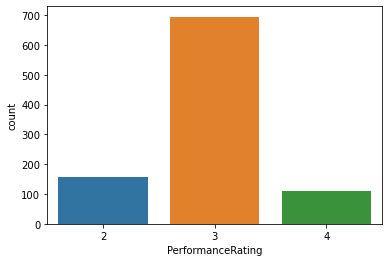

In [33]:
sns.countplot(y_train)

In [34]:
oversampler=SMOTE()
x_train,y_train=oversampler.fit_resample(x_train,y_train)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

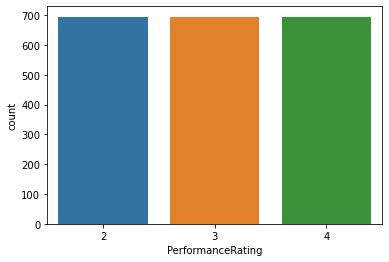

In [35]:
sns.countplot(y_train)